# Problem Statement

Prepare a model for the HR department to predict the Attrition and give the insights from the data
about the important factors associated with the attrition so that HR can take the corrective or
preventive measures to stop or control the attrition.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('HR_Employee_Attrition_Data.csv')

In [3]:
pd.set_option('display.max_columns', None)  # to show all the columns

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

# Exploratory Data Analysis

In [6]:
# Check if there are any null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Setting employee number as our index

df.set_index(['EmployeeNumber'], inplace=True)

In [8]:
# Data from Over18, Employee count and StandardHours is constant hence can be dropped

print("EmployeeCount unique values::", df['EmployeeCount'].unique())
print("Over18 unique values::",df['Over18'].unique())
print("StandardHours unique values::",df['StandardHours'].unique())

EmployeeCount unique values:: [1]
Over18 unique values:: ['Y']
StandardHours unique values:: [80]


In [9]:
df.drop(columns = ['EmployeeCount', 'Over18','StandardHours'], inplace = True)

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [11]:
df.shape

(2940, 31)

<AxesSubplot:xlabel='Age', ylabel='Density'>

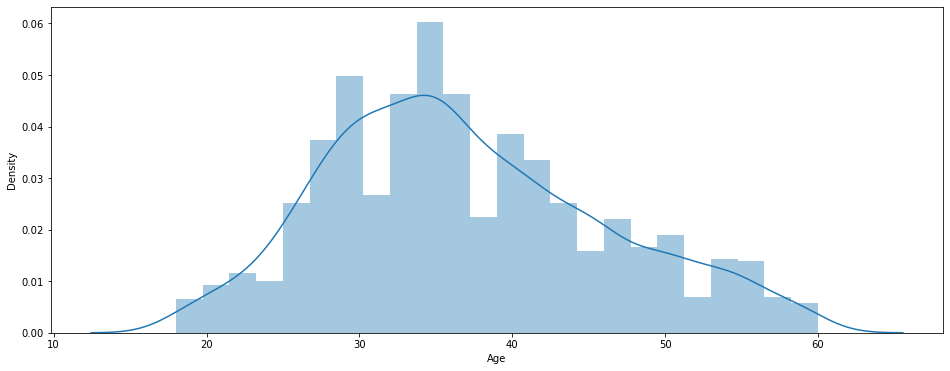

In [12]:
# Plot the Age distribution

plt.figure(figsize = (16,6))
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Attrition', ylabel='count'>

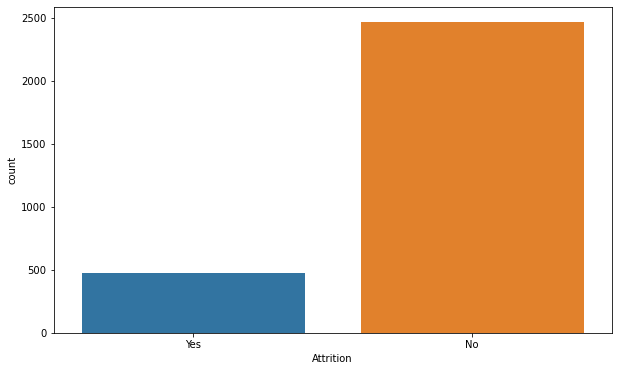

In [13]:
# Plot count of Attrition

plt.figure(figsize = (10,6))
sns.countplot('Attrition', data = df)

In [14]:
# Calculate the attrition percentage

print('Attrition % in the org is:',(df['Attrition'].value_counts()['Yes']/df['Attrition'].count())*100)


Attrition % in the org is: 16.122448979591837


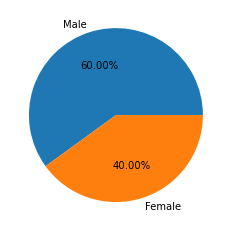

In [15]:
# Percentage of employees Genderwise

plt.pie(x=df['Gender'].value_counts(), labels= df['Gender'].value_counts().index, autopct=('%0.2f%%'))
plt.show()

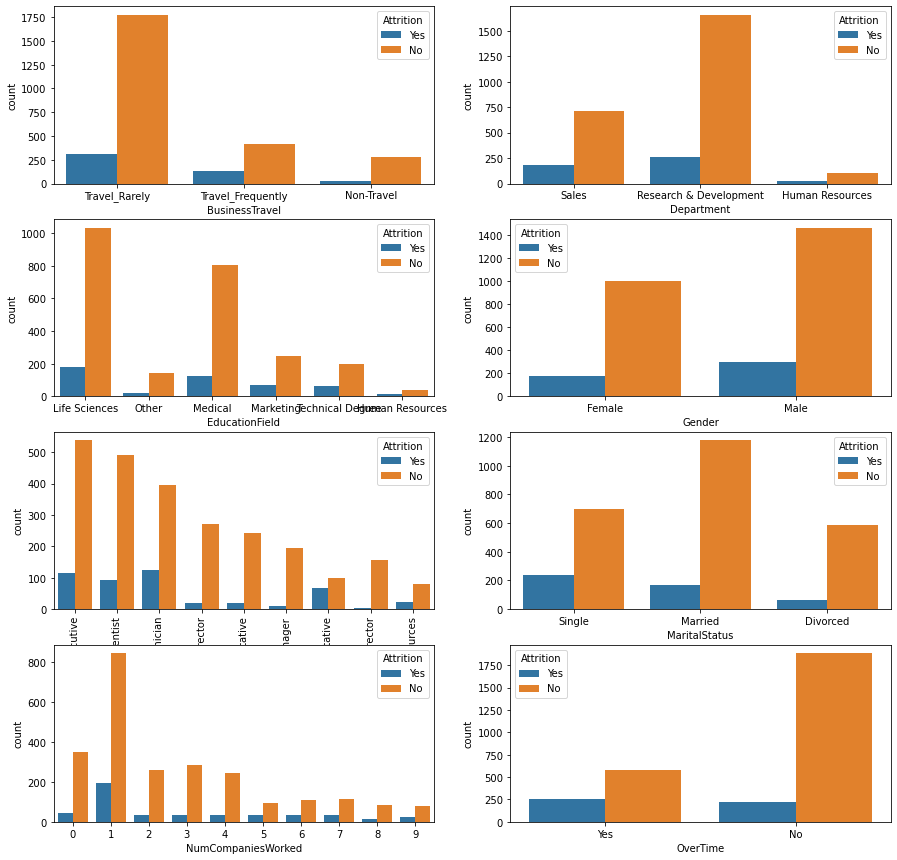

In [98]:
# Count plots of some categorical variables

plt.subplots(4,2,figsize=(15,15))

plt.subplot(4,2,1)
sns.countplot(x='BusinessTravel', data=df, hue='Attrition')

plt.subplot(4,2,2)
sns.countplot(x='Department', data=df, hue='Attrition')

plt.subplot(4,2,3)
sns.countplot(x='EducationField', data=df, hue='Attrition')

plt.subplot(4,2,4)
sns.countplot(x='Gender', data=df, hue='Attrition')

plt.subplot(4,2,5)
sns.countplot(x='JobRole', data=df, hue='Attrition')
plt.xticks(rotation=90)

plt.subplot(4,2,6)
sns.countplot(x='MaritalStatus', data=df, hue='Attrition')

plt.subplot(4,2,7)
sns.countplot(x='NumCompaniesWorked', data=df, hue='Attrition')

plt.subplot(4,2,8)
sns.countplot(x='OverTime', data=df, hue='Attrition')

plt.show()

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

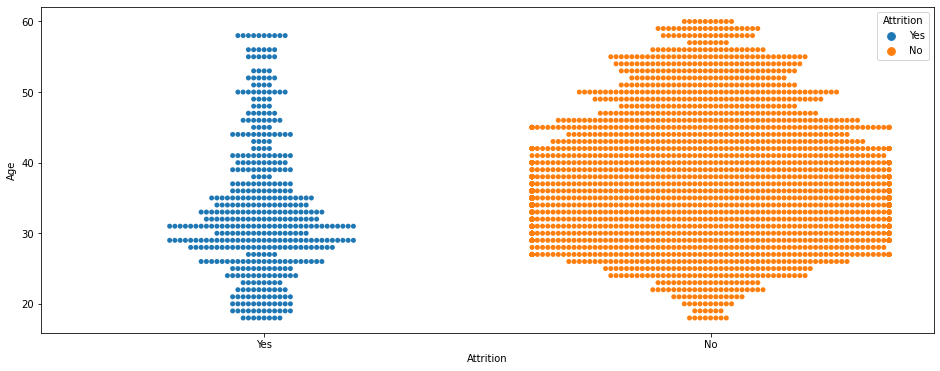

In [17]:
# Check to see if there is any relation b/w Age and Attrition

plt.figure(figsize = (16,6))
sns.swarmplot(x = 'Attrition', y = 'Age', data = df, hue = 'Attrition')


#### From the above plot we can see that there is no linear relation between Age and Attrition, but bulk of the attrition is happening between the age groups of 25-35

In [12]:
df1= df.copy()

In [19]:
# Converting 'Department' data to ordinal variable

#Sales = 1
#Research and Development = 2
#Human Resorces = 3

df1.loc[df1['Department'] == 'Sales', 'Ordinal_Department'] = 1
df1.loc[df1['Department'] == 'Research & Development', 'Ord_Department'] = 2
df1.loc[df1['Department'] == 'Human Resources', 'Ord_Department'] = 3


In [20]:
departmentgrp = df1.groupby(by = 'Department')

In [21]:
# Calculating attrition % for each department

#Sales
attrbysales = departmentgrp.get_group('Sales')['Attrition'].value_counts()
#HR
attrbyHR = departmentgrp.get_group('Human Resources')['Attrition'].value_counts()
#RnD
attrbyRnD = departmentgrp.get_group('Research & Development')['Attrition'].value_counts()
#Department
attrbydept = pd.DataFrame(columns = ['Department', 'Attrition'])

attrbydept.loc[len(attrbydept)] = ["Sales", attrbysales['Yes']/(attrbysales.sum())*100]
attrbydept.loc[len(attrbydept)] = ["HR",(attrbyHR['Yes']/attrbyHR.sum())*100]
attrbydept.loc[len(attrbydept)] = ["R&D",(attrbyRnD['Yes']/attrbyRnD.sum())*100]

attrbydept

,Department,Attrition
0,Sales,20.627803
1,HR,19.047619
2,R&D,13.839750


#### Attrition is highest in sales team followed by HR  team

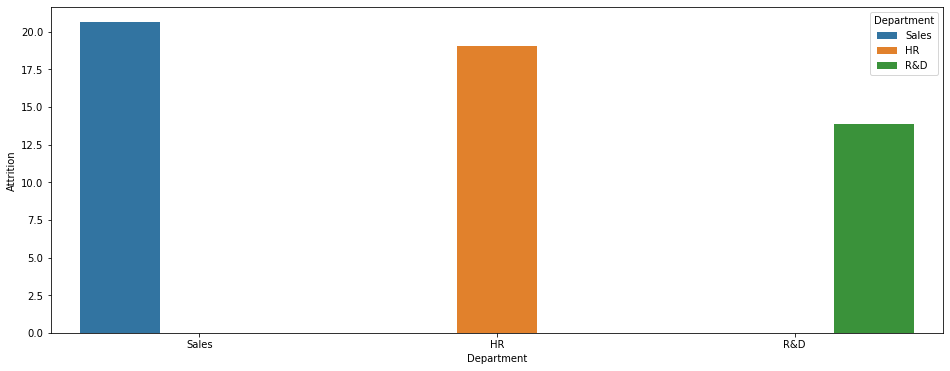

In [22]:
# Plotting Attrition% for each department

plt.figure(figsize = (16,6))
sns.barplot(x= 'Department', y = 'Attrition' , data = attrbydept, hue = 'Department')
plt.show()

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

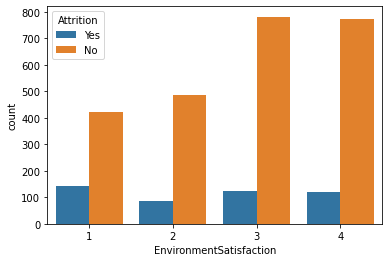

In [23]:
sns.countplot(df['EnvironmentSatisfaction'], data=df, hue='Attrition')

In [32]:
# Calculating Attrition vs Environment Satisfaction

envsatisfcationgrp = df1.groupby(['EnvironmentSatisfaction','Attrition'])
envsatisfcationgrp.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [82]:
count = envsatisfcationgrp.get_group((1, 'Yes'))['EnvironmentSatisfaction'].count()
count

144

In [33]:
AttrperEnvSat = pd.DataFrame(columns = ['EnvironmentSatisfaction', 'Attrition', 'Count'])
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['1', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144


In [34]:
count = envsatisfcationgrp.get_group((2, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['2', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86


In [35]:
count = envsatisfcationgrp.get_group((3, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['3', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86
2,3,Yes,124


In [36]:
count = envsatisfcationgrp.get_group((4, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['4', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86
2,3,Yes,124
3,4,Yes,120


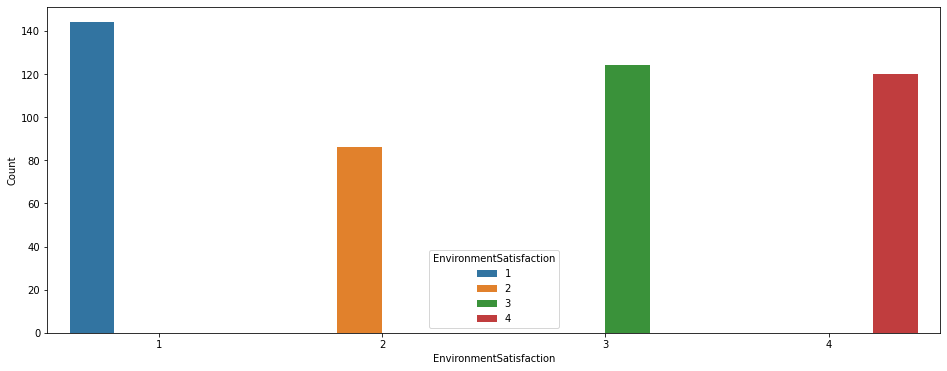

In [37]:
# Plotting Attrition vs Environmentsatisfaction
plt.figure(figsize = (16,6))
sns.barplot(x= 'EnvironmentSatisfaction', y = 'Count' , data = AttrperEnvSat, hue = 'EnvironmentSatisfaction')
plt.show()

#### Attrition is highest for group that has EnvironmentSatisfaction of '1', but for level '3' and '4' its high as well.

<AxesSubplot:xlabel='Gender', ylabel='count'>

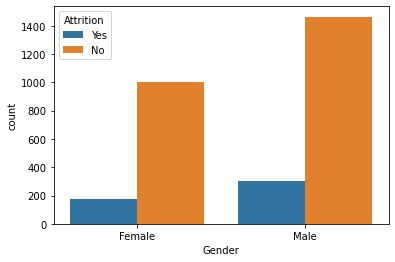

In [83]:
# Attrition by gender

sns.countplot(df['Gender'], data=df, hue='Attrition')

In [38]:
AttrGender = df1.groupby(['Attrition', 'Gender'])
AttrGender.groups.keys()

dict_keys([('No', 'Female'), ('No', 'Male'), ('Yes', 'Female'), ('Yes', 'Male')])

In [39]:
AttrperGend = pd.DataFrame(columns = ['Gender', 'Attrition', 'Count'])
AttrperGend

,Gender,Attrition,Count


In [40]:
count = AttrGender.get_group(('Yes', 'Female'))['Attrition'].count()
AttrperGend.loc[len(AttrperGend)] = ['Female', 'Yes', count]
AttrperGend

,Gender,Attrition,Count
0,Female,Yes,174


In [41]:
count = AttrGender.get_group(('Yes', 'Male'))['Attrition'].count()
AttrperGend.loc[len(AttrperGend)] = ['Male', 'Yes', count]
AttrperGend

,Gender,Attrition,Count
0,Female,Yes,174
1,Male,Yes,300


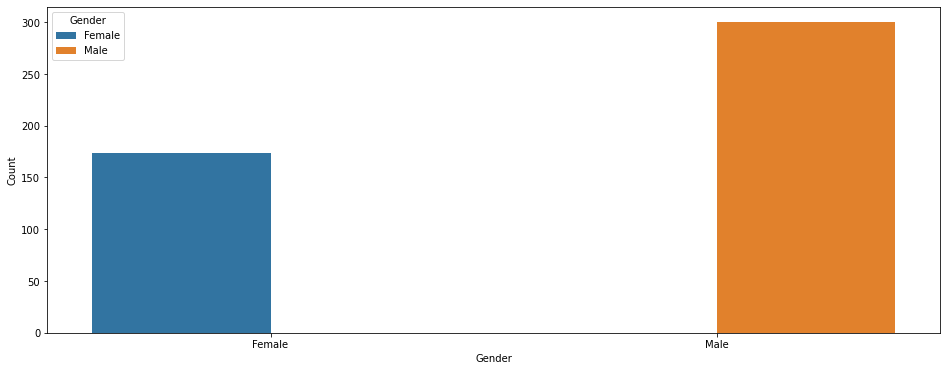

In [42]:
# Plotting Attrition vs Gender

plt.figure(figsize = (16,6))
sns.barplot(x= 'Gender', y = 'Count' , data = AttrperGend, hue = 'Gender')
plt.show()

#### Male's have higher attrition numbers

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

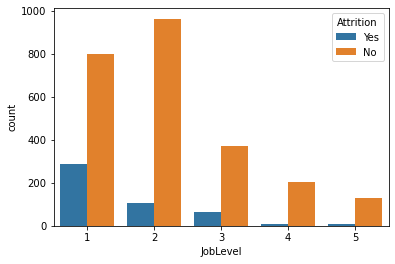

In [84]:
# Attrition by job level

sns.countplot(df['JobLevel'], data=df, hue='Attrition')

In [43]:
attrbyJoblvl = df1.groupby(['JobLevel', 'Attrition'])
attrbyJoblvl.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes'), (5, 'No'), (5, 'Yes')])

In [44]:
count = attrbyJoblvl.get_group((1, 'Yes'))['Attrition'].count() 
count

286

In [45]:
attrvsJoblvl = pd.DataFrame(columns = ['JobLevel', 'Attrition', 'count', 'Attr%'])
attrvsJoblvl

,JobLevel,Attrition,count,Attr%


In [47]:
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['1', 'Yes', count, (count/df1['JobLevel'].value_counts()[1])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175


In [48]:
count = attrbyJoblvl.get_group((2, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['2', 'Yes', count, (count/df1['JobLevel'].value_counts()[2])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828


In [49]:
count = attrbyJoblvl.get_group((3, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['3', 'Yes', count, (count/df1['JobLevel'].value_counts()[3])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899


In [50]:
count = attrbyJoblvl.get_group((4, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['4', 'Yes', count, (count/df1['JobLevel'].value_counts()[4])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899
3,4,Yes,10,4.716981


In [51]:
count = attrbyJoblvl.get_group((5, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['5', 'Yes', count, (count/df1['JobLevel'].value_counts()[5])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899
3,4,Yes,10,4.716981
4,5,Yes,10,7.246377


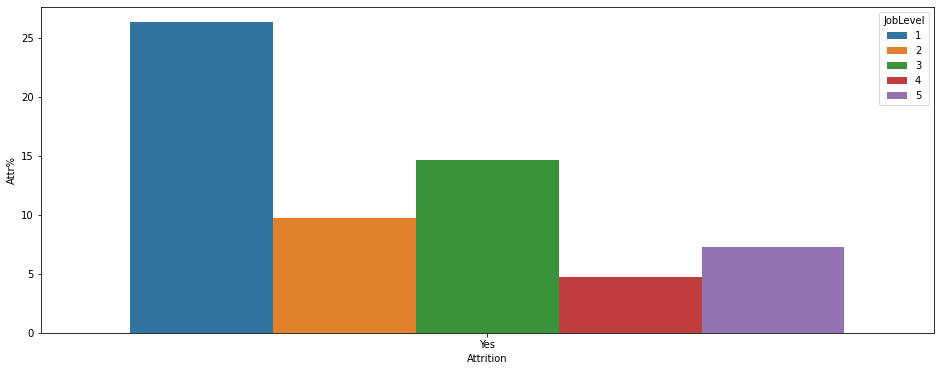

In [52]:
# Plotting Attrition vs Job Level

plt.figure(figsize = (16,6))
sns.barplot(x= 'Attrition', y = 'Attr%' , data = attrvsJoblvl, hue = 'JobLevel')
plt.show()

#### Attrition % is highest in Job level 1, followed by job level 3

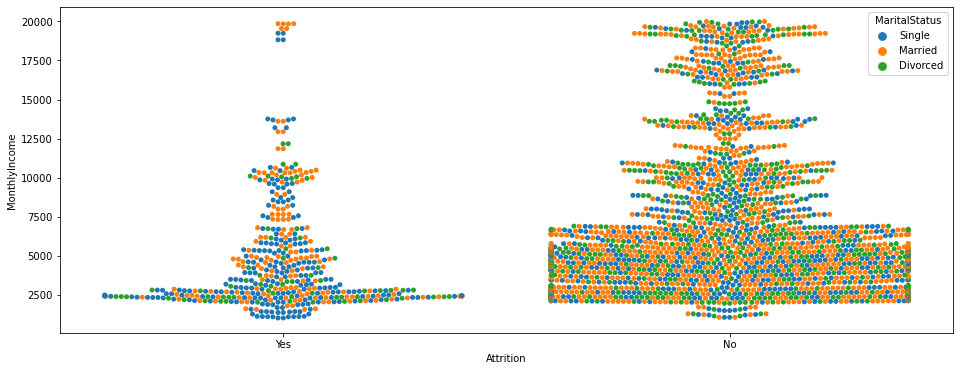

In [59]:
# Plotting Attrition vs monthly income

plt.figure(figsize = (16,6))
sns.swarmplot(x= 'Attrition', y = 'MonthlyIncome' , data = df1, hue= 'MaritalStatus')
plt.show()

#### Attrition is highest where employees are earning between 2500-5000.

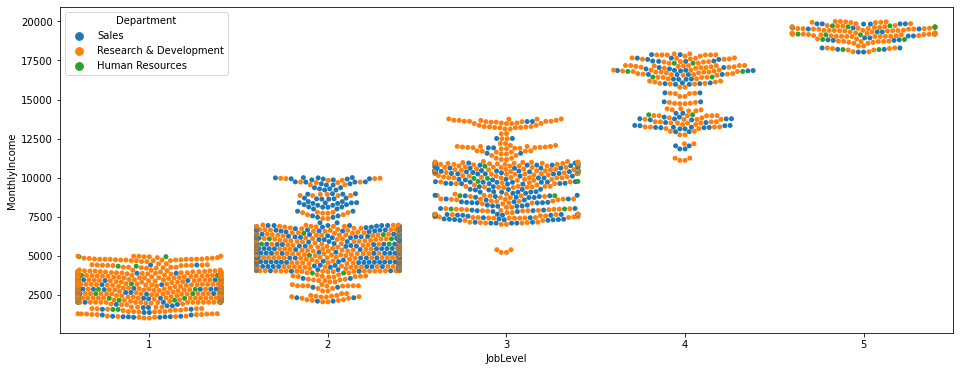

In [60]:
# Plotting Joblevel vs monthly income

plt.figure(figsize = (16,6))
sns.swarmplot(x= 'JobLevel', y = 'MonthlyIncome' , data = df1, hue= 'Department')
plt.show()

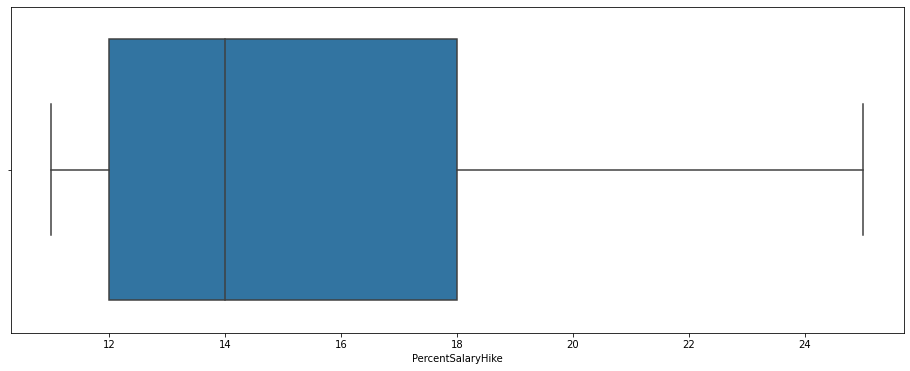

In [61]:
# Plotting box plot for salary hike

plt.figure(figsize = (16,6))
sns.boxplot('PercentSalaryHike', data = df1)
plt.show()

#### The median salary hike is 14% and the mean is 15%. The highest salary hike given is 25%

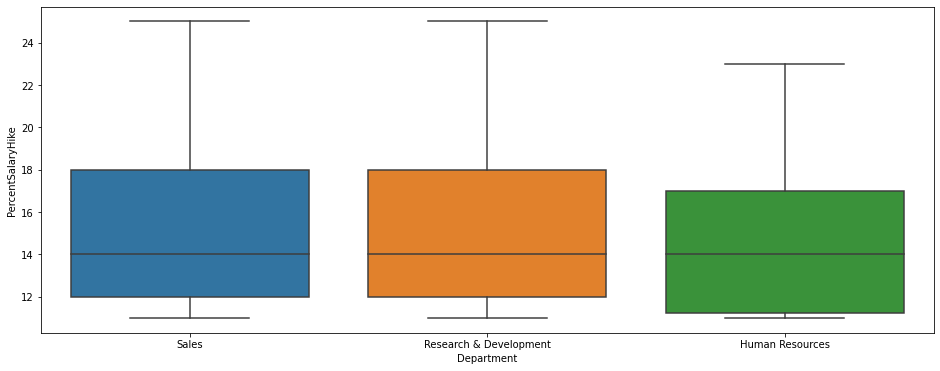

In [63]:
# Plotting hike% for each department

plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'Department', data = df1)
plt.show()

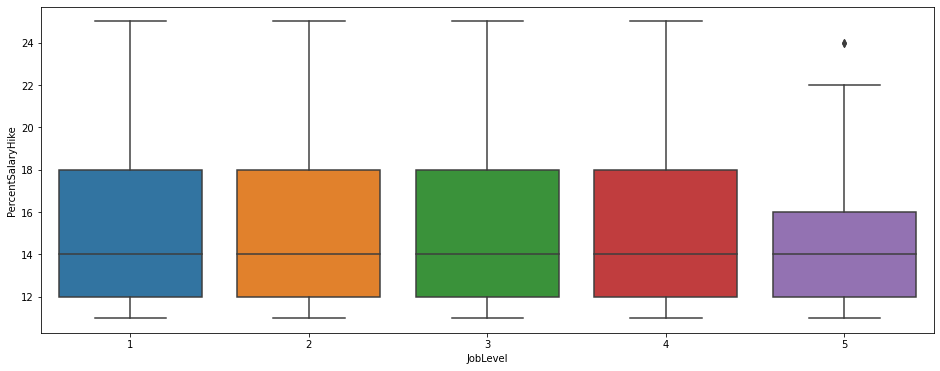

In [64]:
# Plotting hike% for each job level

plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'JobLevel', data = df1)
plt.show()

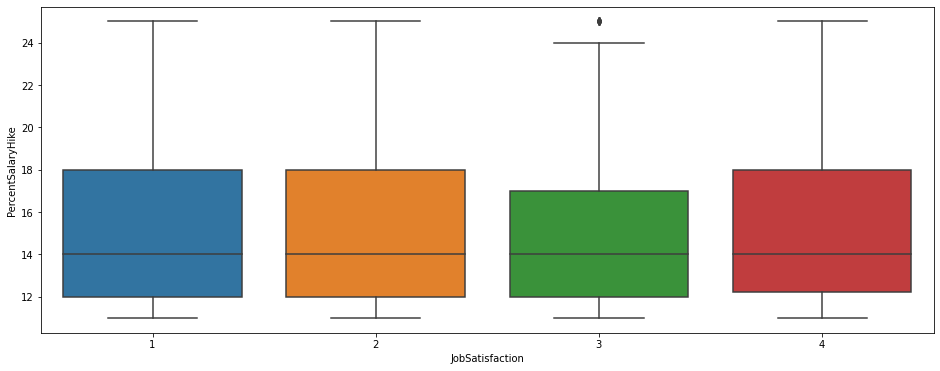

In [65]:
# Plotting hike% for each job satisfaction level

plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'JobSatisfaction', data = df1)
plt.show()

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

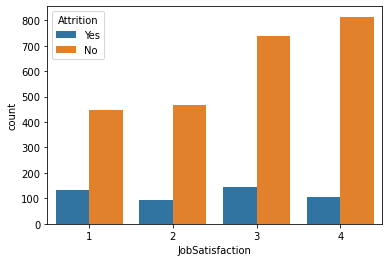

In [85]:
# Attrition vs Job Satisfaction Level

sns.countplot(df['JobSatisfaction'], data=df, hue='Attrition')

In [66]:
grp2 = df1.groupby(['JobSatisfaction', 'Attrition'])
grp2.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [67]:
count = grp2.get_group((1, 'Yes'))['Attrition'].count()
count

132

In [68]:
attrbyJobsat = pd.DataFrame(columns = ['Jobsat','Attrition','Count', 'Attr%'])
attrbyJobsat.loc[len(attrbyJobsat)] = ['1', 'Yes', count, count/df1['JobSatisfaction'].value_counts()[1]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.83737


In [69]:
count = grp2.get_group((2, 'Yes'))['Attrition'].count()
attrbyJobsat.loc[len(attrbyJobsat)] = ['2', 'Yes', count, count/df1['JobSatisfaction'].value_counts()[2]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.837370
1,2,Yes,92,16.428571


In [70]:
count = grp2.get_group((3, 'Yes'))['Attrition'].count()
attrbyJobsat.loc[len(attrbyJobsat)] = ['3', 'Yes', count, count/df1['JobSatisfaction'].value_counts()[3]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.837370
1,2,Yes,92,16.428571
2,3,Yes,146,16.515837


In [71]:
count = grp2.get_group((4, 'Yes'))['Attrition'].count()
attrbyJobsat.loc[len(attrbyJobsat)] = ['4', 'Yes', count, count/df1['JobSatisfaction'].value_counts()[4]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.837370
1,2,Yes,92,16.428571
2,3,Yes,146,16.515837
3,4,Yes,104,11.328976


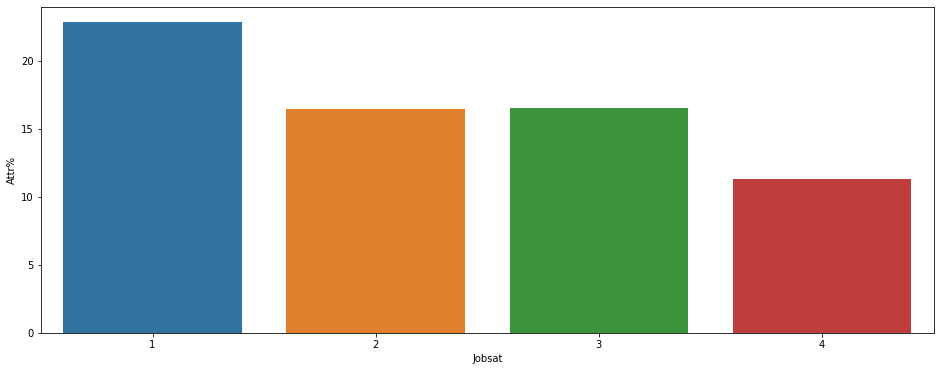

In [72]:
# Plotting Attr% for Job satisfaction level

plt.figure(figsize = (16,6))
sns.barplot(y = 'Attr%', x = 'Jobsat', data = attrbyJobsat)
plt.show()

#### Employees with job satisfaction level of 1 have the highest attrition % of 22.8%

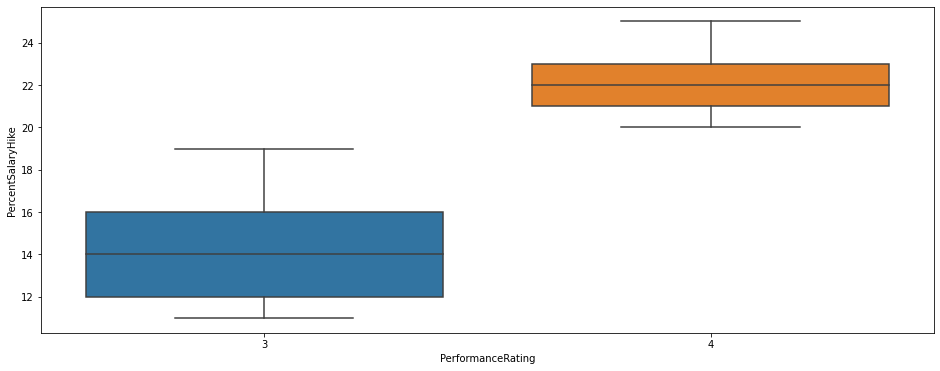

In [73]:
# Plotting 'Performance rating' and 'hike%'

plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'PerformanceRating', data = df1)
plt.show()


#### Employees with rating of 4 have got hikes between 20-25, whereas employees with rating of 3 have got between 11-19

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

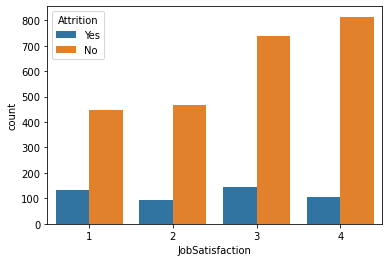

In [86]:
# Attrition vs Relationship Satisfaction

sns.countplot(df['JobSatisfaction'], data=df, hue='Attrition')

In [74]:
grp1 = df1.groupby(['RelationshipSatisfaction', 'Attrition'])
grp1.groups.keys()


dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [75]:
count = grp1.get_group((1, 'Yes'))['Attrition'].count()
count

114

In [76]:
attrbyrelsat = pd.DataFrame(columns = ['Relsat', 'Attrition', 'Count', 'Attr%'])
attrbyrelsat

,Relsat,Attrition,Count,Attr%


In [77]:
attrbyrelsat.loc[len(attrbyrelsat)] = ['1', 'Yes', count, count/df1['RelationshipSatisfaction'].value_counts()[1]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174


In [78]:
count = grp1.get_group((2, 'Yes'))['Attrition'].count()
attrbyrelsat.loc[len(attrbyrelsat)] = ['2', 'Yes', count,count/df1['RelationshipSatisfaction'].value_counts()[2]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174
1,2,Yes,90,14.851485


In [79]:
count = grp1.get_group((3, 'Yes'))['Attrition'].count()
attrbyrelsat.loc[len(attrbyrelsat)] = ['3', 'Yes', count, count/df1['RelationshipSatisfaction'].value_counts()[3]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174
1,2,Yes,90,14.851485
2,3,Yes,142,15.468410


In [80]:
count = grp1.get_group((4, 'Yes'))['Attrition'].count()
attrbyrelsat.loc[len(attrbyrelsat)] = ['4', 'Yes', count, count/df1['RelationshipSatisfaction'].value_counts()[4]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174
1,2,Yes,90,14.851485
2,3,Yes,142,15.468410
3,4,Yes,128,14.814815


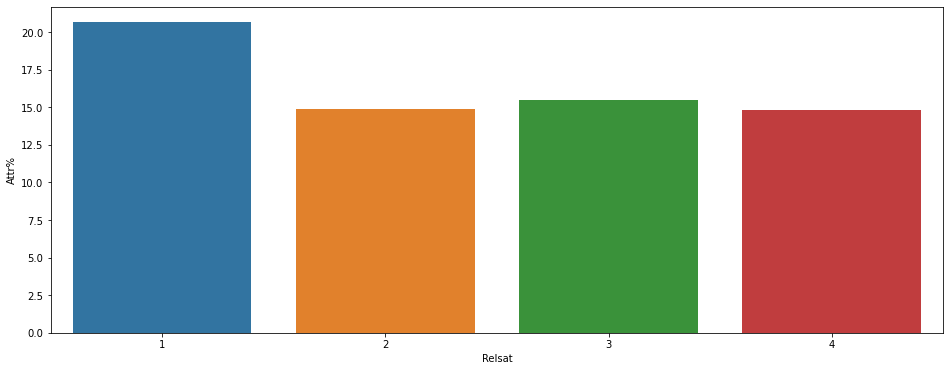

In [81]:
# Plotting Attr% for Relationship satisfaction level

plt.figure(figsize = (16,6))
sns.barplot(y = 'Attr%', x = 'Relsat', data = attrbyrelsat)
plt.show()

#### Employees with relation satisfaction of 1 have highest attrition numbers at 20.65%.

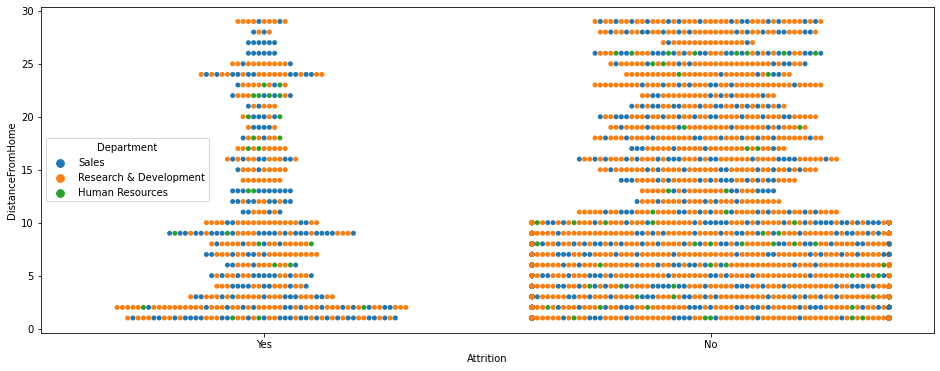

In [99]:
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'Attrition', y = 'DistanceFromHome' , data = df1, hue='Department')
plt.show()

# Machine Learning 

In [13]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_curve, auc,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [14]:
#Converting 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole'
#'MaritalStatus', 'overtime'

def preprocessor(df1):
    le = preprocessing.LabelEncoder()
    
    df1['Attrition'] = le.fit_transform(df1['Attrition'])
    df1['BusinessTravel'] = le.fit_transform(df1['BusinessTravel'])
    df1['Department'] = le.fit_transform(df1['Department'])
    df1['EducationField'] = le.fit_transform(df1['EducationField'])
    df1['Gender'] = le.fit_transform(df1['Gender'])
    df1['JobRole'] = le.fit_transform(df1['JobRole'])
    df1['MaritalStatus'] = le.fit_transform(df1['MaritalStatus'])
    df1['OverTime'] = le.fit_transform(df1['OverTime'])
    return df1

In [15]:
encoded_df = preprocessor(df1)

In [16]:
encoded_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
2,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
3,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
4,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
5,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [17]:
# Segregating the Independent and the dependant variable

x = encoded_df.drop(['Attrition'],axis =1).values
y = encoded_df['Attrition'].values

In [18]:
#Splitting into training and testing

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

## Decision Tree Model

In [18]:
model_dt = DecisionTreeClassifier(random_state=1)

In [41]:
# Hyperparameter tuning

param_dist = {'max_depth': [12,13,14,15], 
              'min_samples_split':[4,5,10,15],
              'min_samples_leaf':[4,5,10,15],
              'criterion': ['gini', 'entropy']
             }

cv_dt = GridSearchCV(model_dt, cv = 10,     
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_dt.fit(x_train, y_train)

print('Best Parameters using grid search: \n', cv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 4, 'min_samples_split': 4}


In [42]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=13, criterion = "entropy",min_samples_leaf= 4, min_samples_split= 4)
model_dt.fit(x_train, y_train)

model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)

model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.9685374149659864
Testing score:  0.8979591836734694


In [43]:
# Caluclating the probabilities for the AUC curve

y_pred_prob = model_dt.predict_proba(x_test)[:, 1]
y_pred_prob

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.85714286, 0.        , 0.        , 0.57142857,
       0.        , 0.4       , 0.        , 1.        , 0.04      ,
       0.        , 0.        , 0.        , 0.5       , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.5       ,
       0.6       , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.16666667,
       1.        , 0.        , 0.25      , 0.4       , 0.        ,
       0.75      , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.5       , 0.        , 0.        ,
       0.75      , 0.        , 0.        , 0.        , 0.     

## Performance Metrics

In [44]:
# Predicting the Attrition for x_test

predictions = model_dt.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [45]:
# Calculating fpr and tpr

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob) 
roc_auc_dt = auc(fpr_dt, tpr_dt)

## Area Under the Curve

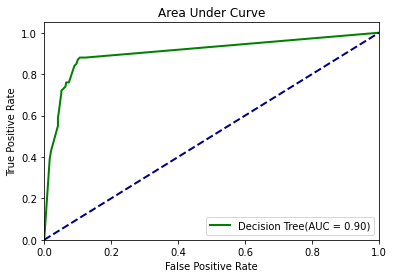

In [46]:
# Area under curve

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

#### Area under curve is 90%

## Confusion Matrix

In [47]:
print (confusion_matrix(y_test, predictions))

[[467  21]
 [ 39  61]]


In [48]:
accuracy_score(y_test, predictions)

0.8979591836734694

In [49]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Stayed", "Left"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

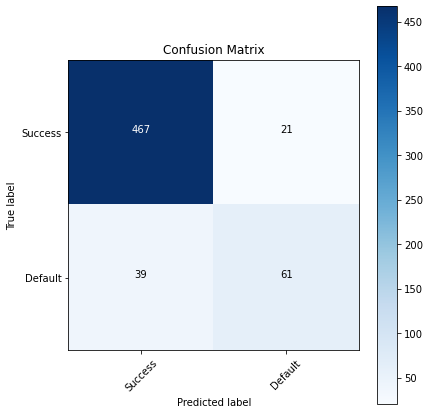

In [50]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

# Random Forest Classifier

In [21]:
model_rf = RandomForestClassifier(random_state=42)

## OOB Error Rate

In [20]:
# To calculate value of n_estimator, OOB Error Rate graph is plotted

model_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    model_rf.set_params(n_estimators=i)
    model_rf.fit(x_train, y_train)

    oob_error = 1 - model_rf.oob_score_
    error_rate[i] = oob_error

In [21]:
# Convert dictionary to a pandas series for easy plotting 

oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 100 trees)')

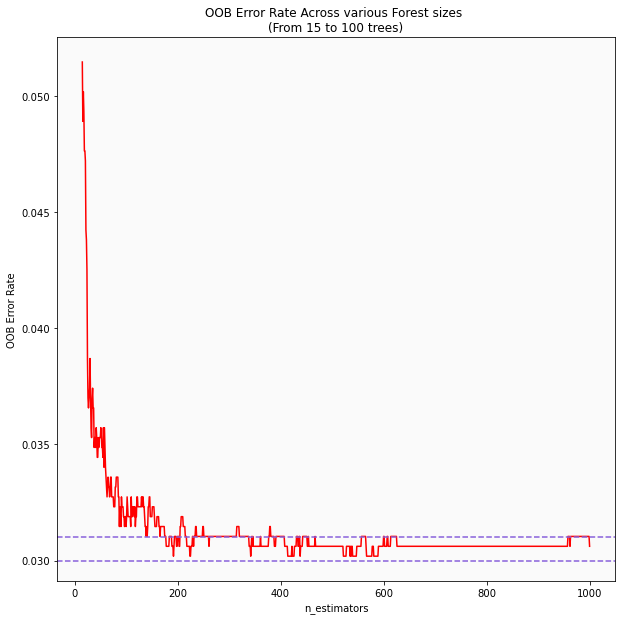

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.031, color='#875FDB',linestyle='--')
plt.axhline(0.03, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 100 trees)')

### Above graph is stable when n_estimator value is above 630 hence selecting 630 as n_estimator

In [24]:
# Refine the tree via OOB Output

model_rf.set_params(n_estimators= 630,
                  warm_start=False, 
                  oob_score=False,)   # bcz already oob calculation is done

RandomForestClassifier(n_estimators=630, random_state=42)

# Train the RandomForest

In [25]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=630, random_state=42)

In [26]:
model_rf_score_train = model_rf.score(x_train, y_train)
print("Training score: ",model_rf_score_train)

model_rf_score_test = model_rf.score(x_test, y_test)
print("Testing score: ",model_rf_score_test)

Training score:  1.0
Testing score:  0.9795918367346939


In [27]:
# Caluclating the probabilities for the AUC curve

y_pred_prob = model_rf.predict_proba(x_test)[:, 1]
y_pred_prob

array([0.00634921, 0.08253968, 0.03968254, 0.17777778, 0.03809524,
       0.17142857, 0.05873016, 0.77777778, 0.09206349, 0.0984127 ,
       0.06190476, 0.17142857, 0.01904762, 0.10634921, 0.00952381,
       0.14761905, 0.03333333, 0.04603175, 0.09206349, 0.27619048,
       0.03333333, 0.06349206, 0.03333333, 0.43015873, 0.04126984,
       0.03174603, 0.66825397, 0.00634921, 0.0968254 , 0.01746032,
       0.06190476, 0.15396825, 0.05714286, 0.07777778, 0.06825397,
       0.06666667, 0.02063492, 0.7031746 , 0.12539683, 0.75873016,
       0.06349206, 0.12380952, 0.07460317, 0.07460317, 0.01746032,
       0.04761905, 0.06507937, 0.21111111, 0.05079365, 0.75238095,
       0.01269841, 0.12380952, 0.05714286, 0.08412698, 0.18571429,
       0.02539683, 0.84444444, 0.06031746, 0.01587302, 0.04126984,
       0.04444444, 0.72539683, 0.01746032, 0.13174603, 0.02222222,
       0.01111111, 0.03968254, 0.01269841, 0.03333333, 0.0952381 ,
       0.03968254, 0.05555556, 0.07142857, 0.02857143, 0.76507

In [28]:
#Predicting the Attrition for x_test

y_pred = model_rf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Performance metrics

In [29]:
# Model Accuracy:

print ("Model Accuracy is::", (model_rf.score(x_test, y_test))*100)

# Recall

print("Model recall is::", (recall_score(y_test, y_pred))*100)

Model Accuracy is:: 97.95918367346938
Model recall is:: 85.71428571428571


In [30]:
#Area under the curve

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

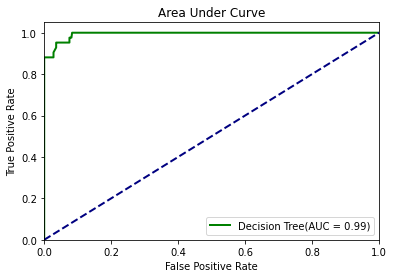

In [31]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

#### Area Under Curve is 99%

## Confusion Matrix

In [32]:
#Printing confusion matrix

print (confusion_matrix(y_test, y_pred))

[[504   0]
 [ 12  72]]


In [33]:
import itertools
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Stayed", "Left"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

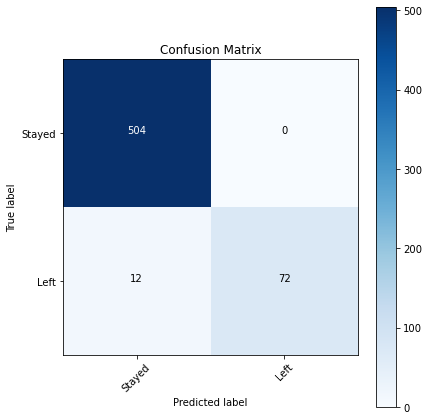

In [34]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(y_pred, normalize=False)
plt.show()

## Variable Importance

Feature ranking:
1. feature 15 (0.075990)
2. feature 18 (0.066850)
3. feature 0 (0.062494)
4. feature 2 (0.056600)
5. feature 16 (0.051455)
6. feature 9 (0.049982)
7. feature 4 (0.049635)
8. feature 23 (0.048004)
9. feature 26 (0.042912)
10. feature 19 (0.034567)
11. feature 17 (0.034513)
12. feature 29 (0.032388)
13. feature 12 (0.030775)
14. feature 7 (0.030553)
15. feature 27 (0.028555)
16. feature 22 (0.026692)
17. feature 10 (0.026201)
18. feature 13 (0.026012)
19. feature 24 (0.025417)
20. feature 28 (0.025308)
21. feature 25 (0.025070)
22. feature 11 (0.023022)
23. feature 6 (0.022391)
24. feature 21 (0.022243)
25. feature 14 (0.021773)
26. feature 5 (0.020134)
27. feature 1 (0.014067)
28. feature 3 (0.012290)
29. feature 8 (0.009481)
30. feature 20 (0.004627)


Text(0.5, 0, 'index of the feature')

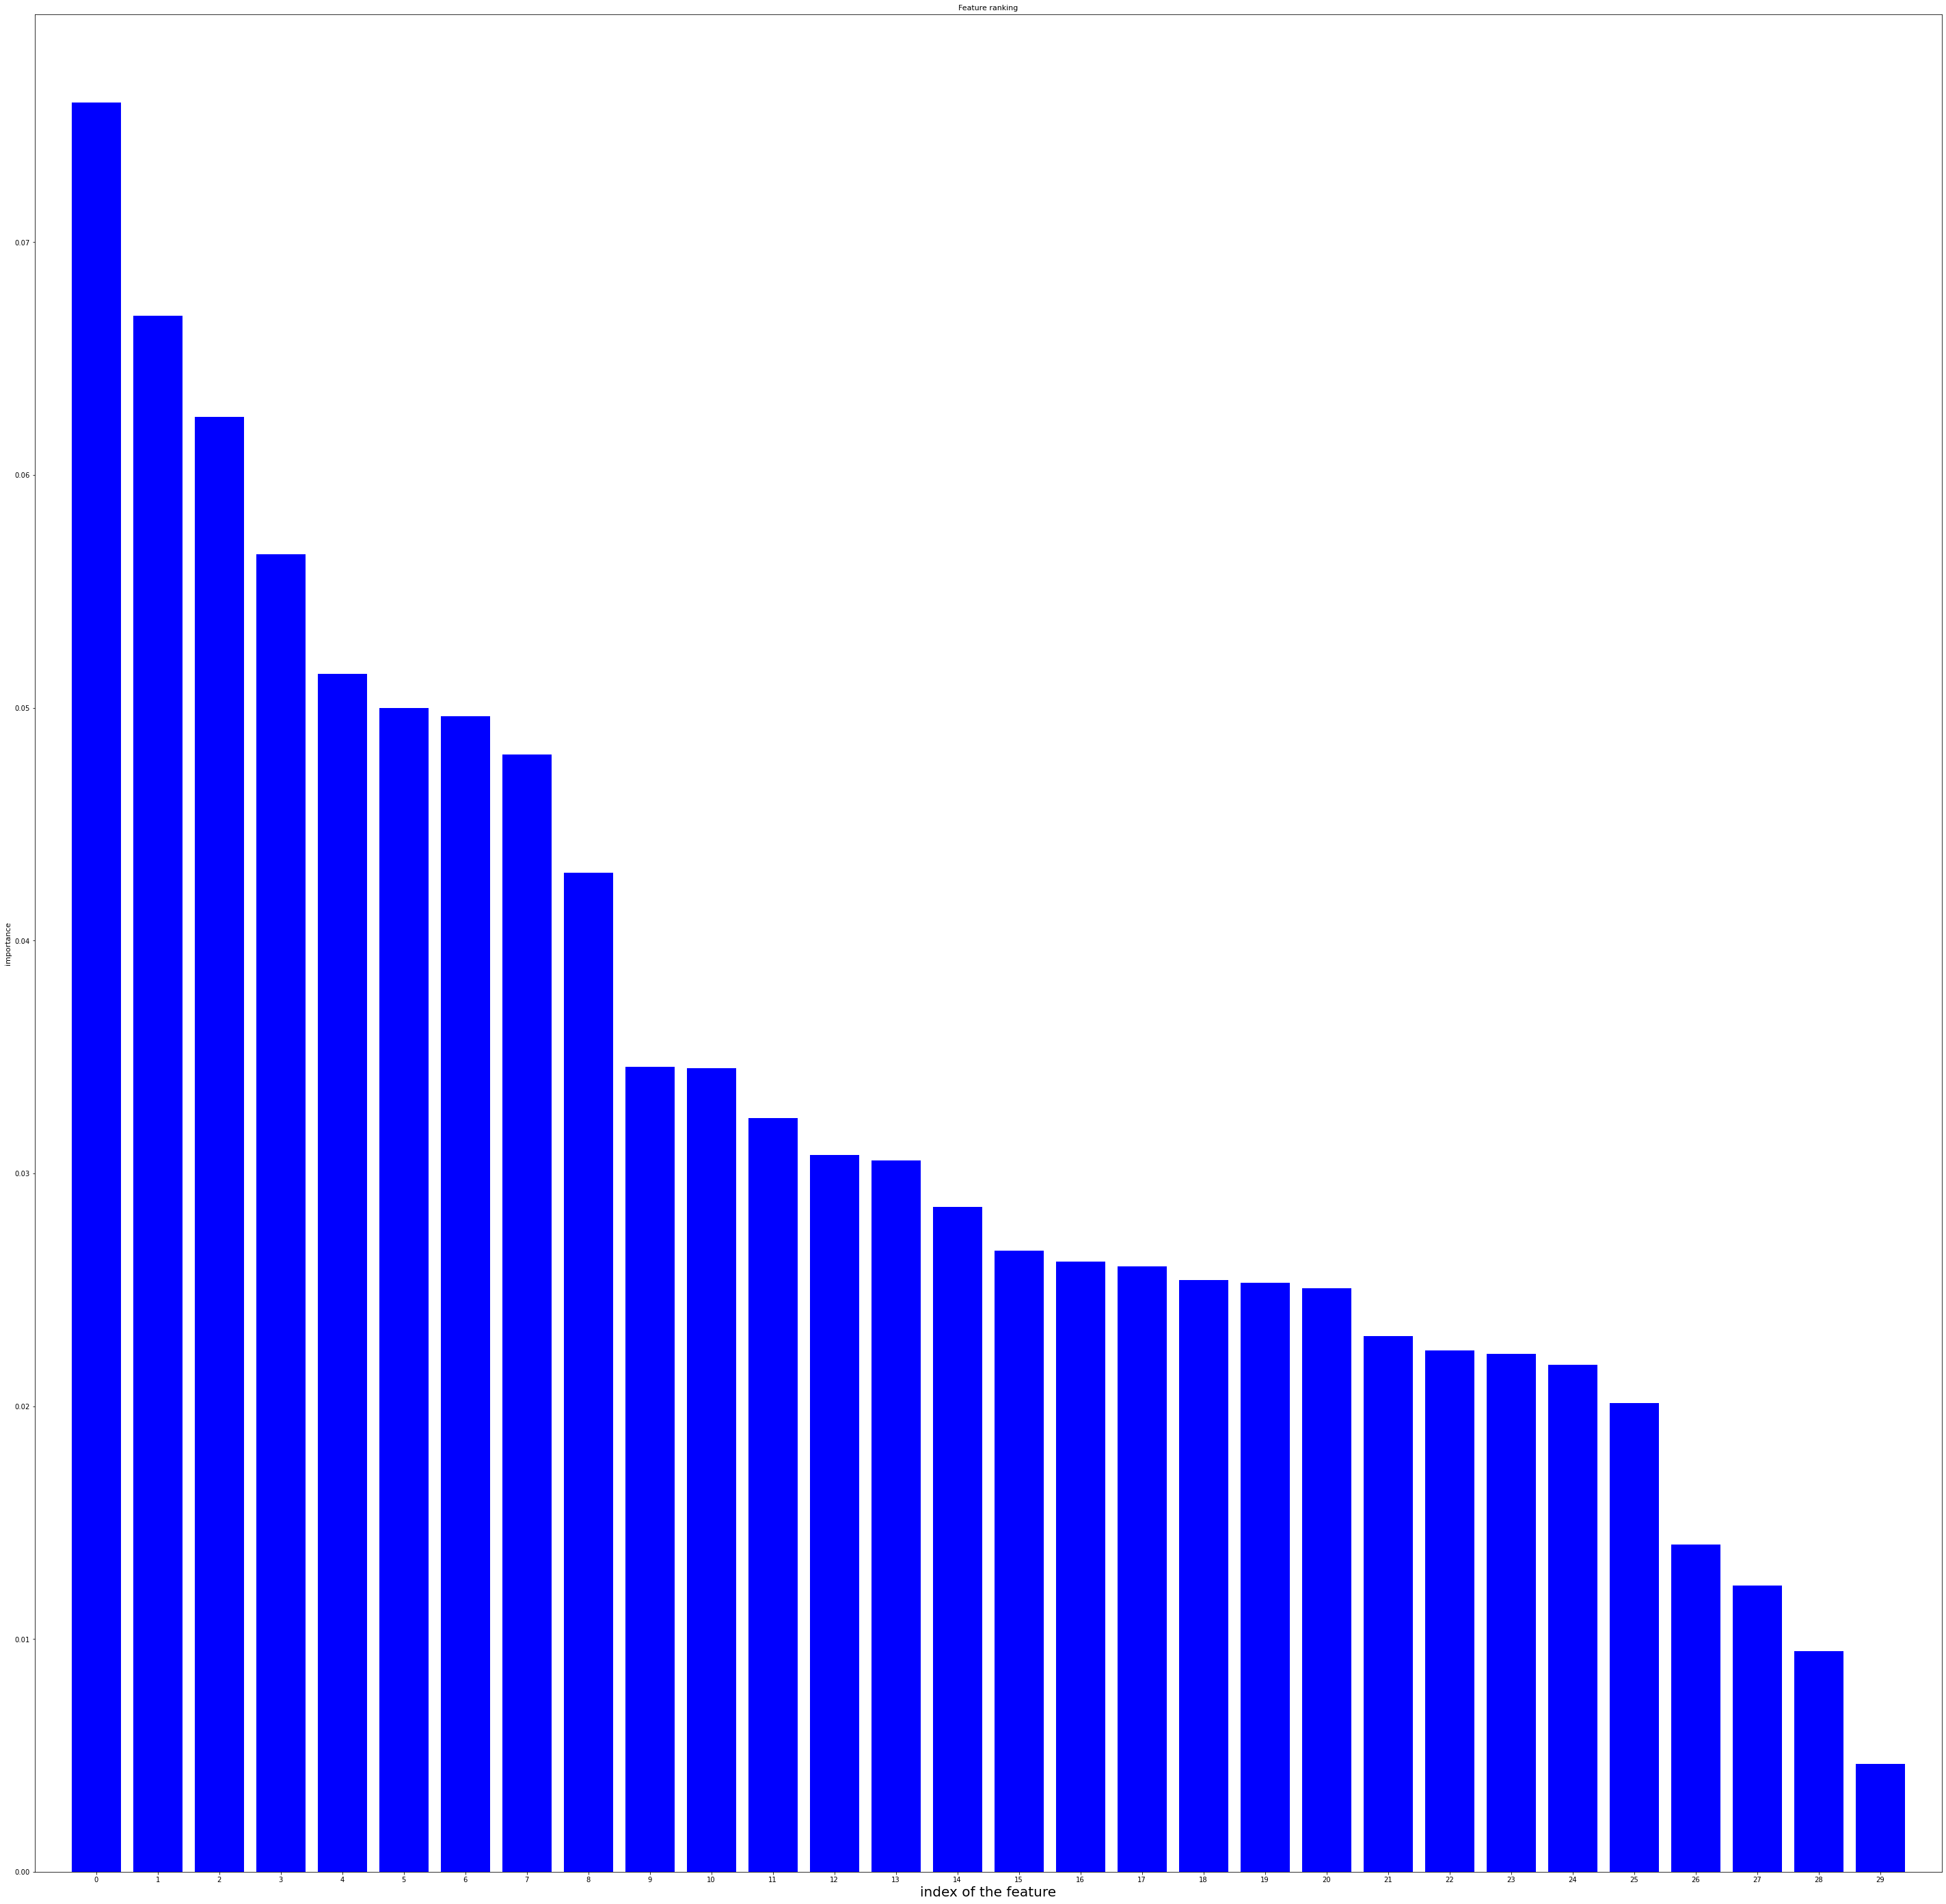

In [35]:
importances= model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
f, ax = plt.subplots(figsize=(50,50))
plt.title("Feature ranking", fontsize = 11)
plt.bar(range(x_train.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(x_train.shape[1]))
plt.xlim([-1, x_train.shape[1]])
plt.ylabel("importance", fontsize = 11)
plt.xlabel("index of the feature", fontsize = 20)

# Conclusion

#### Random Forest is the best classifier for predicting employee attrition for our dataset with 97.95% model accuracy